### 1. SETUP & DEPENDENCIES

In [1]:
# Import core libraries for data manipulation, numerical computation, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib for inline plotting within a Jupyter Notebook environment.
%matplotlib inline

### 2. DATA INGESTION

In [2]:
# Define the path to the dataset. Using a constant improves maintainability.
DATA_SOURCE_PATH = 'diabetes.csv'

# Load the dataset into a pandas DataFrame for analysis.
# The `_df` suffix is a common convention to denote a DataFrame variable.
diabetes_df = pd.read_csv(DATA_SOURCE_PATH)

### 3. INITIAL DATA VALIDATION

In [3]:
# As a preliminary step in exploratory data analysis (EDA), inspect the feature
# names to verify the dataset loaded correctly and to get a high-level
# overview of the available data fields.
print("Successfully loaded dataset. Feature columns are:")
print(diabetes_df.columns)

Successfully loaded dataset. Feature columns are:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Print the dimensions (rows, columns) of the diabetes dataset to verify its size
print("Dimension of diabetes data: {}".format(diabetes_df.shape))

Dimension of diabetes data: (768, 9)


In [6]:
# Display the count of records grouped by the 'Outcome' column 
# (0 = non-diabetic, 1 = diabetic) to check class distribution
print(diabetes_df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


### 4. Visualizing Class Distribution


C:\Users\vasud\AppData\Local\Temp\ipykernel_14172\3722245465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes_df, palette=['blue', 'orange'], label="Count")


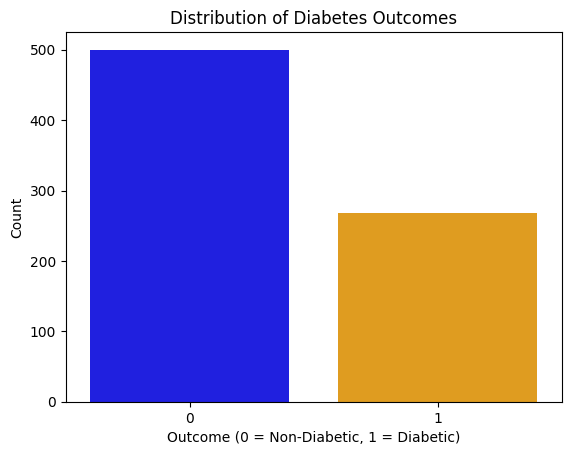

In [7]:
# Import seaborn for visualization
import seaborn as sns  

# Plot the count of each class in the 'Outcome' column 
# (helps visualize class imbalance in the dataset)
sns.countplot(x='Outcome', data=diabetes_df, palette=['blue', 'orange'], label="Count")

plt.title("Distribution of Diabetes Outcomes")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.show()

### 5. Dataset Overview


In [9]:
# Display concise summary of the DataFrame
# This shows the column names, data types, non-null counts, and memory usage.
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 6. Model Training and Evaluation with K-Nearest Neighbors (KNN)

In [10]:
# Import train_test_split for splitting the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Split the dataset into training (X_train, y_train) and testing sets (X_test, y_test)
# Features = all columns except 'Outcome'
# Target = 'Outcome'
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_df.loc[:, diabetes_df.columns != 'Outcome'], 
    diabetes_df['Outcome'], 
    stratify=diabetes_df['Outcome'], 
    random_state=66
)

In [11]:
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing accuracy scores
training_accuracy = []
test_accuracy = []

# Try different values of k (number of neighbors) from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Initialize KNN model with the given number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model on training data
    knn.fit(X_train, y_train)
    
    # Record accuracy on training set
    training_accuracy.append(knn.score(X_train, y_train))
    
    # Record accuracy on testing set
    test_accuracy.append(knn.score(X_test, y_test))

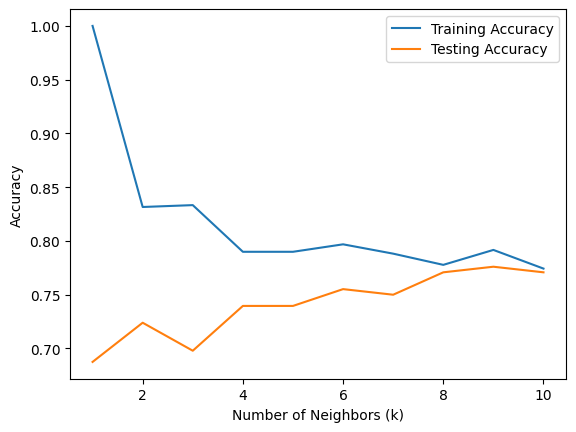

In [12]:
# Plot training vs testing accuracy to observe underfitting/overfitting
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.legend()
plt.show()

### 7. Final KNN Model Evaluation

In [13]:
# Initialize KNN classifier with the optimal number of neighbors (k=9)
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Evaluate and print accuracy on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

# Evaluate and print accuracy on the testing set
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


### 8. Decision Tree Classifier Evaluation

In [ ]:
# Import Decision Tree Classifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)

# Train the model on the training data
tree.fit(X_train, y_train)

# Evaluate and print accuracy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

# Evaluate and print accuracy on the testing set
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


The Decision Tree Classifier achieved 100% accuracy on the training set, but performed significantly worse on the test set. This indicates that the model is overfitting; it memorizes the training data rather than learning patterns that generalize to unseen data.

To address this, we applied pre-pruning by setting max_depth=3. Limiting the depth of the tree reduces overfitting, which slightly lowers training accuracy but improves test accuracy, resulting in a more balanced and generalizable model.

### 9. Decision Tree Classifier with Pre-Pruning (max_depth=3)

In [15]:
# Initialize Decision Tree with a maximum depth of 3 to reduce overfitting
# Limiting depth forces the tree to make more generalized splits
tree = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train the pruned Decision Tree model
tree.fit(X_train, y_train)

# Evaluate and print accuracy on the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

# Evaluate and print accuracy on the testing set
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


### Feature Importance in Decision Trees

Feature importance indicates how much each feature contributes to the predictions made by a Decision Tree classifier.  
It assigns a value between **0 and 1** to each feature:  

- **0** → The feature was not used at all for splitting.  
- **1** → The feature alone would perfectly predict the target.  

The feature importance values across all features always sum up to **1**, providing a clear view of which features drive the model’s decisions the most.

### 10. Displaying Feature Importances

In [16]:
# Print the feature importance values calculated by the Decision Tree
# Each value represents how much a feature contributes to the model's decisions
# The values sum to 1 across all features
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


### 11. Visualizing Feature Importances of the Decision Tree


Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


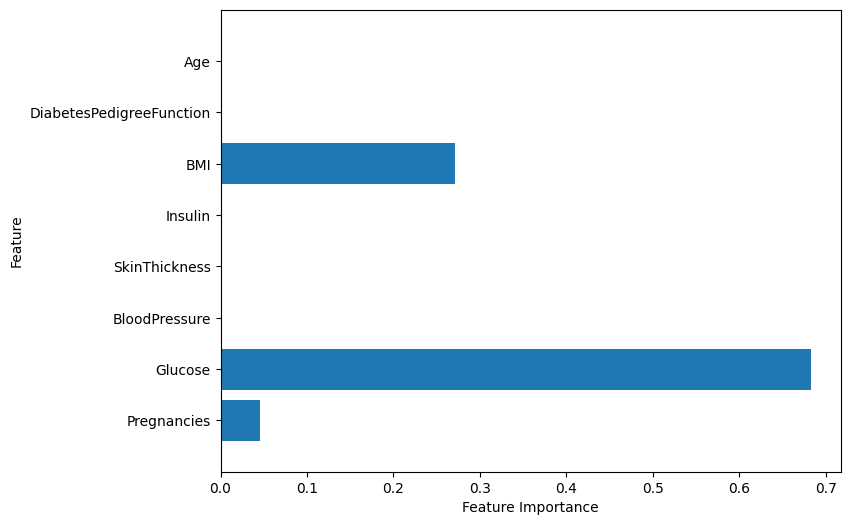

In [18]:
# Define the feature names (all columns except 'Outcome')
diabetes_features = [x for x in diabetes_df.columns if x != 'Outcome']
print("Feature names:", diabetes_features)

# Function to plot feature importances for the Decision Tree model
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8, 6))  # Set figure size for readability
    
    n_features = 8  # Number of features in the dataset
    
    # Create a horizontal bar chart of feature importances
    plt.barh(range(n_features), model.feature_importances_, align='center')
    
    # Set y-axis labels to feature names
    plt.yticks(np.arange(n_features), diabetes_features)
    
    # Label axes
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    
    # Set y-axis limits for clean plotting
    plt.ylim(-1, n_features)

# Call the function to visualize feature importances of the trained Decision Tree
plot_feature_importances_diabetes(tree)

**So the Glucose feature is used the most to predict diabetes.**